<a href="https://colab.research.google.com/github/galdir/Deep-Learning-Previsao-com-Keras/blob/master/Previsao_de_aluguel_de_bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#carregamento da base de dados


In [67]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import numpy as np

from tensorflow.keras.layers import LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import GRU

import matplotlib as mpl




In [2]:
bike = pd.read_csv('bicicletas.csv')

In [3]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bike['datas'] = pd.to_datetime(bike['datas'])

In [5]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

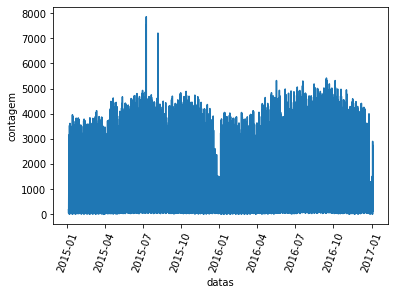

In [6]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

# normalizando os dados

In [7]:
sc2 = StandardScaler()

In [8]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

# separando entre treino e teste

In [10]:
tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste

In [11]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

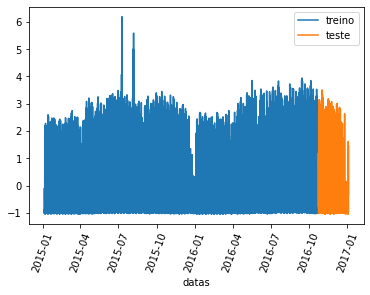

In [12]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino') 
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70) 

In [13]:
vetor = pd.DataFrame(ytreino)[0]

In [14]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [15]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)


In [16]:
xtreino_novo[0:5]


array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [17]:
ytreino_novo[0:5]


array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [18]:
vetor2 = pd.DataFrame(yteste)[0]


In [19]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)


## experimentando perceptron tradicional

In [20]:
regressor = Sequential()

In [21]:
regressor.add(Dense(8, input_dim=10, kernel_initializer='ones', activation='linear',use_bias=False))
regressor.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 64        
Total params: 656
Trainable params: 656
Non-trainable params: 0
_________________________________________________________________


In [22]:
historico = regressor.fit(xtreino_novo,ytreino_novo,
                          validation_data=(xteste_novo,yteste_novo),
                          epochs =100)

Epoch 1/100
490/490 [==============================] - 1s 1ms/step - loss: 0.9091 - accuracy: 0.0000e+00 - val_loss: 0.4718 - val_accuracy: 0.0000e+00
Epoch 2/100
490/490 [==============================] - 1s 1ms/step - loss: 0.3827 - accuracy: 0.0000e+00 - val_loss: 0.2194 - val_accuracy: 0.0000e+00
Epoch 3/100
490/490 [==============================] - 1s 1ms/step - loss: 0.2334 - accuracy: 0.0000e+00 - val_loss: 0.1699 - val_accuracy: 0.0000e+00
Epoch 4/100
490/490 [==============================] - 1s 1ms/step - loss: 0.1992 - accuracy: 0.0000e+00 - val_loss: 0.1489 - val_accuracy: 0.0000e+00
Epoch 5/100
490/490 [==============================] - 1s 1ms/step - loss: 0.1821 - accuracy: 0.0000e+00 - val_loss: 0.1401 - val_accuracy: 0.0000e+00
Epoch 6/100
490/490 [==============================] - 1s 1ms/step - loss: 0.1724 - accuracy: 0.0000e+00 - val_loss: 0.1374 - val_accuracy: 0.0000e+00
Epoch 7/100
490/490 [==============================] - 1s 1ms/step - loss: 0.1647 - accuracy: 

In [23]:
y_predict_ajuste = regressor.predict(xtreino_novo)

In [24]:
y_predict_teste = regressor.predict(xteste_novo)


In [25]:
resultado = pd.DataFrame(y_predict_teste)[0]


In [26]:
ytreino_novo.shape

(15662,)

In [27]:
bike.shape

(17414, 10)

In [28]:
tamanho_treino

15672

In [29]:
bike[9:tamanho_treino-1].shape

(15662, 10)

In [30]:
yteste_novo.shape

(1732,)

In [31]:
tamanho_teste

1742

In [32]:
bike[tamanho_treino:-1].shape

(1741, 10)

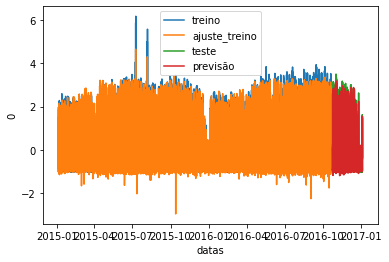

In [33]:
sns.lineplot(x='datas',y=ytreino_novo,data=bike[9:tamanho_treino-1],label='treino')
sns.lineplot(x='datas',y=pd.DataFrame(y_predict_ajuste)[0],data=bike[9:tamanho_treino-1],label='ajuste_treino')

sns.lineplot(x='datas',y=yteste_novo,data=bike[tamanho_treino:-10],label='teste')
sns.lineplot(x='datas',y=resultado.values,data=bike[tamanho_treino:-10],label='previsão')

In [34]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

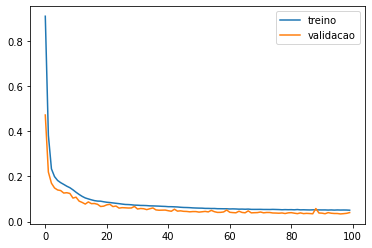

In [44]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino','validacao'])

# A rede neural recorrente LSTM 

A entrada de rede recorrente LSTM deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [36]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [37]:
xtreino_novo.shape

(15662, 10, 1)

In [38]:
xtreino_novo[0]

array([[-0.88574518],
       [-0.9262953 ],
       [-0.92998167],
       [-0.98712048],
       [-1.01016032],
       [-1.01108192],
       [-1.00647395],
       [-0.9843557 ],
       [-0.93274645],
       [-0.77607553]])

In [39]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

## Usando a LSTM

In [40]:
recorrente = Sequential()


In [41]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))

In [42]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [43]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)


Epoch 1/100
490/490 [==============================] - 6s 12ms/step - loss: 0.2406 - val_loss: 0.0717
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0793 - val_loss: 0.0506
Epoch 3/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0556 - val_loss: 0.0301
Epoch 4/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0464 - val_loss: 0.0326
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0427 - val_loss: 0.0274
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0396 - val_loss: 0.0236
Epoch 7/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0375 - val_loss: 0.0254
Epoch 8/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0356 - val_loss: 0.0269
Epoch 9/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0348 - val_loss: 0.0195
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.033

In [45]:
y_ajustado = recorrente.predict(xtreino_novo)


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

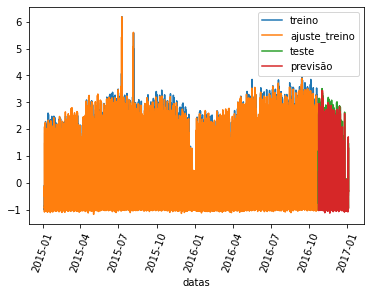

In [54]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],label='previsão')
plt.xticks(rotation=70) 

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

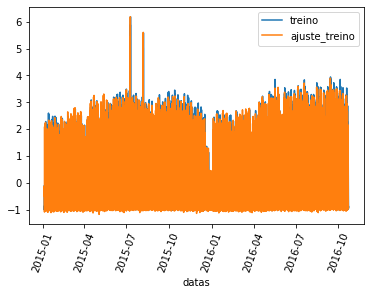

In [53]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')

plt.xticks(rotation=70) 

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

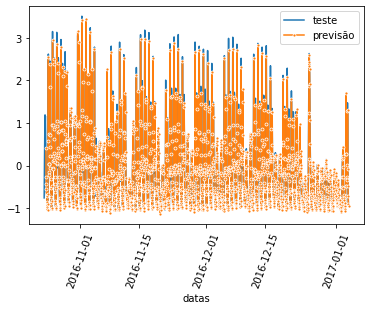

In [48]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

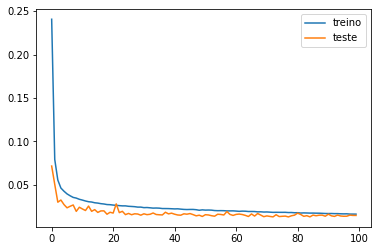

In [49]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

## experimentando GRU

In [56]:
recorrente_g = Sequential()


In [57]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))

In [58]:
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [59]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 5s 10ms/step - loss: 0.2062 - val_loss: 0.0438
Epoch 2/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0657 - val_loss: 0.0347
Epoch 3/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0515 - val_loss: 0.0326
Epoch 4/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0429 - val_loss: 0.0269
Epoch 5/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0391 - val_loss: 0.0313
Epoch 6/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0363 - val_loss: 0.0220
Epoch 7/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0347 - val_loss: 0.0247
Epoch 8/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0334 - val_loss: 0.0217
Epoch 9/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0318 - val_loss: 0.0241
Epoch 10/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0310 - val_l

In [61]:
y_predito2 = recorrente_g.predict(xteste_novo)


(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

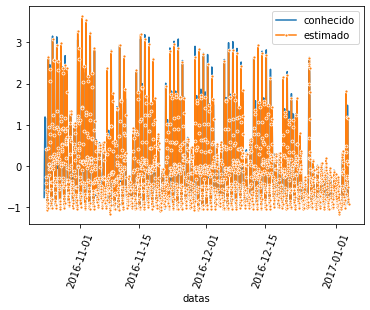

In [62]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70) 

In [63]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


In [68]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

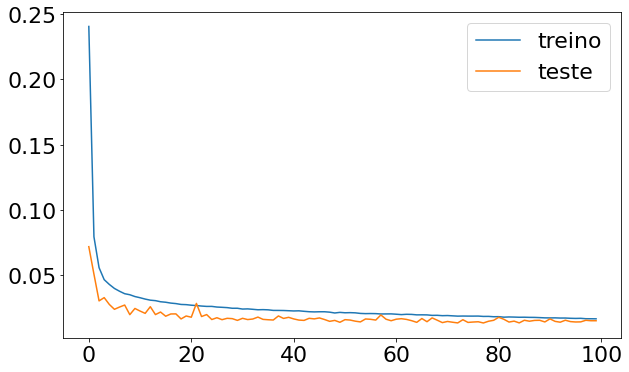

In [69]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

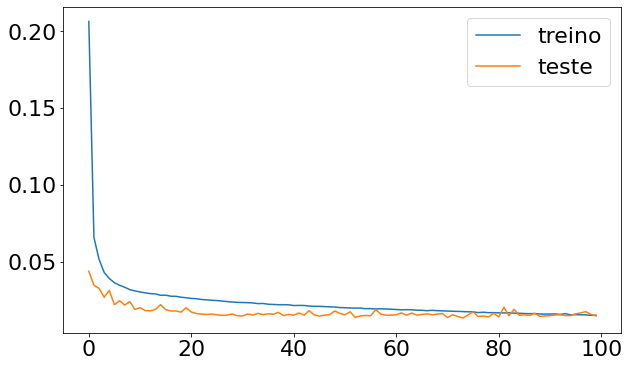

In [70]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
